# Price Prediction for Second Hand Cars in Germany

## Contents

1-Exploratory Data Analysis (EDA)

  1-2-Feature Engineering

2-Modeling 

  2-0-Splitting the Data Set
  
  2-1-Linear Regression
  
  2-2-Decision Tree
  
  2-3-Bagging
  
  3-4-AdaBoost
  
  2-5-K-Nearest Neighbours
  
  2-6-Random Forest

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import time
from IPython.display import display

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1- Exploratory Data Analysis (EDA)

The data set is cleaned in eda.ipynb and stored in final_car_data.csv. 

In [2]:
selected_df = pd.read_csv('final_car_data.csv')

In [3]:
selected_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
89723,2023,28988,75.0,10.0,0
89724,2023,29077,81.0,1869.0,0
89725,2023,28780,75.0,10.0,0
89726,2023,28788,81.0,5.0,0


In [4]:
selected_df.describe

<bound method NDFrame.describe of        year  price  power_kw  mileage_in_km  brand
0      2011   9900     103.0       119000.0      2
1      2011   9290     118.0       184574.0      2
2      2011   9499      77.0       114860.0      2
3      2011  11990     103.0       205013.0      2
4      2011  10900     150.0       192350.0      2
...     ...    ...       ...            ...    ...
89723  2023  28988      75.0           10.0      0
89724  2023  29077      81.0         1869.0      0
89725  2023  28780      75.0           10.0      0
89726  2023  28788      81.0            5.0      0
89727  2023  28420      81.0         4900.0      0

[89728 rows x 5 columns]>

## 2-Modeling 

### 2-0-Splitting the Data Set

In [5]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = selected_df.drop(columns='price').values  # Assuming 'price' is the target variable
y = selected_df['price'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.02000e+03 9.60000e+01 1.66900e+04 3.00000e+00]
 [2.02100e+03 8.10000e+01 2.57020e+04 3.00000e+00]
 [2.01500e+03 1.10000e+02 1.20000e+05 5.00000e+00]
 ...
 [2.01400e+03 7.70000e+01 2.40521e+05 0.00000e+00]
 [2.01200e+03 2.30000e+02 3.54500e+05 2.00000e+00]
 [2.01600e+03 1.10000e+02 1.38000e+05 4.00000e+00]]
[[2.0160e+03 6.6000e+01 1.3200e+05 0.0000e+00]
 [2.0170e+03 9.0000e+01 5.6802e+04 1.0000e+00]
 [2.0150e+03 9.2000e+01 1.3700e+05 5.0000e+00]
 ...
 [2.0130e+03 5.1000e+01 1.7450e+05 3.0000e+00]
 [2.0200e+03 7.0000e+01 2.0700e+04 7.0000e+00]
 [2.0190e+03 8.5000e+01 5.3935e+04 7.0000e+00]]
[17490 16420 11000 ...  7000  8800 14990]
[17900 23990 11880 ...  5500 17390 18480]


### 2-1-Linear Regression

In [6]:
%run regression.ipynb
out = linear_reg(X_train, X_test, y_train, y_test)
print('Cross-Validation Error Metrics:')
display(out[1])
y_pred = out[0]

Cross-Validation Error Metrics:


,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2865.16,2382.52,0.64,2900.38,2394.6,2878.36,2384.12,0.66


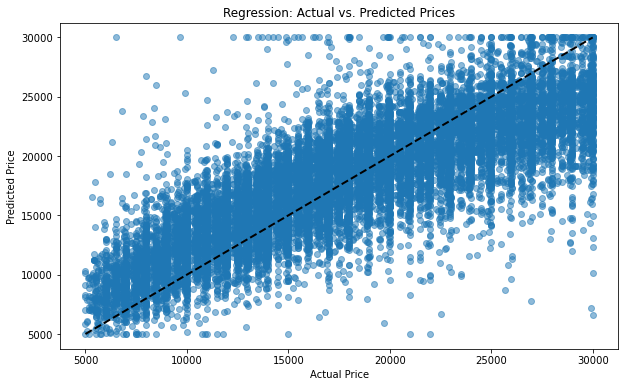

In [7]:
# Plotting y_test and y_pred_test to understand the spread.

fig = plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression: Actual vs. Predicted Prices')
plt.show()

In [8]:
# Linear Regression After Scaling
%run regression.ipynb
out = linear_reg_scaled(X_train, X_test, y_train, y_test)
print('Cross-Validation Error Metrics (Scaled):')
display(out[1])

Cross-Validation Error Metrics (Scaled):


,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2865.16,2382.52,0.64,2900.38,2394.6,2878.36,2384.12,0.66


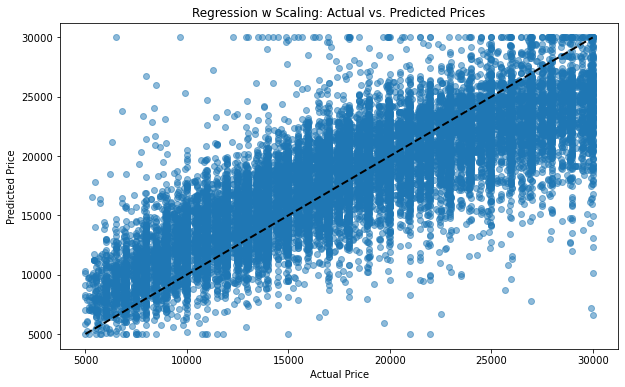

In [9]:
# Plotting scaled version of y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression w Scaling: Actual vs. Predicted Prices')
plt.show()

#### Conclusion

The results seem quite satisfactory; scaling does not change errors much.

 ###  2-2-Decision Tree

In [11]:
%run Decision_Tree.ipynb

y_pred_test, df_errors, scale_X, scale_y = decision_tree(X_train, X_test, y_train, y_test, cv_folds=5, decimal_places=2)

# Display the cross-validation error metrics
print('Cross-Validation Error Metrics (Decision Tree):')
display(df_errors)

Cross-Validation Error Metrics (Decision Tree):


,MAE CV,medAE CV,R2 CV,MAE CV (mean),medAE Train (mean),MAE Test,medAE Test,Dec. Tree Score
0,2841.28,2000.0,0.61,2842.48,2001.8,2801.93,2000.0,0.61


#### Conclusion.

The errors are slightly worse than the linear regression model.

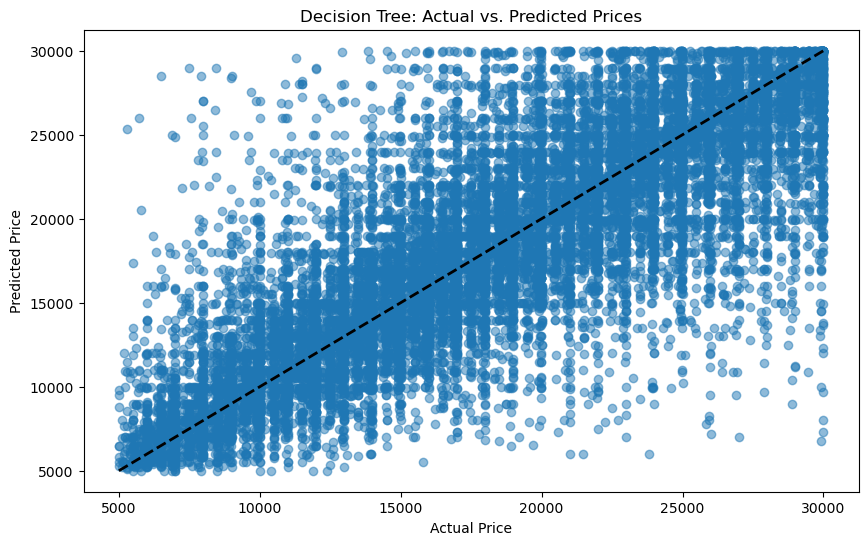

In [12]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs. Predicted Prices')
plt.show()

## 2-3-Bagging

In [31]:
%run Bagging.ipynb
import time

start_time = time.time()

estimator_range = [2, 4, 6, 8]  # estimator range selection
out = bagging(X_train, X_test, y_train, y_test, estimator_range, cv_folds=5, decimal_places=2)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
print('Cross-Validation Error Metrics (Bagging Regressor):')
display(out[1])

Execution Time:  81.53914713859558
Cross-Validation Error Metrics (Bagging Regressor):


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2,2650.11,1954.50,0.67,2650.11,1957.60,2627.72,1909.00,0.67
1,4,2494.26,1832.50,0.71,2494.26,1831.85,2472.51,1794.97,0.71
2,6,2440.78,1793.33,0.72,2440.78,1793.25,2423.92,1763.46,0.72
3,8,2413.93,1769.00,0.73,2413.93,1768.85,2391.86,1739.50,0.73


#### Note. 
Accuracy increases as the estimator increases, hence below we try the model for higher values of n_estimators. Also, the errors look satisfactory in comparison with linear regression and decision tree models.

In [30]:
start_time = time.time()

estimator_range = [10,12]  # estimator range selection
out = bagging(X_train, X_test, y_train, y_test, estimator_range, cv_folds=5, decimal_places=2)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
print('Cross-Validation Error Metrics (Bagging Regressor):')
display(out[1])

Execution Time:  69.5996880531311
Cross-Validation Error Metrics (Bagging Regressor):


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,10,2396.42,1760.71,0.73,2396.42,1759.66,2376.28,1734.10,0.73
1,12,2384.02,1754.71,0.73,2384.02,1754.49,2364.22,1722.54,0.74


"for n_estimators in estimator_range:\n    display(out[1][out[1]['n_estimators'] == n_estimators])\n"

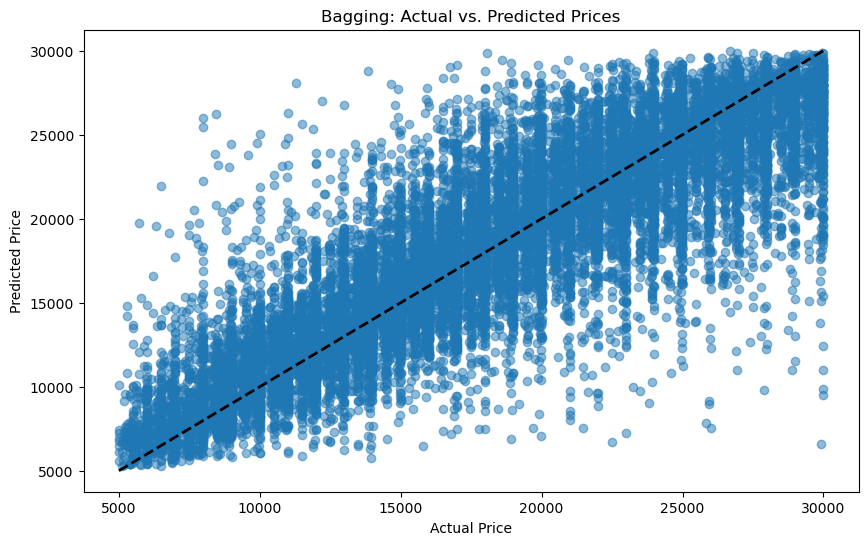

In [18]:
# Plotting y_test and y_pred_test to understand the spread.
y_pred_test = out[0]

fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Bagging: Actual vs. Predicted Prices')
plt.show()

#### Conclusion. 
As expected, Bagging has better errors than the previous models, while it takes longer time as expected. 

### 2-4-AdaBoost  w Cross Validation

In [8]:
%run adaboost.ipynb

start_time = time.time()

estimator_range = [2, 4]  # Estimator range selection
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
display(out[1])

Execution Time:  49.53453016281128


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2,2957.04,2060.0,0.58,2957.04,2061.90,2858.20,2009.0,0.61
1,4,2676.88,1960.0,0.65,2676.88,1963.88,2654.44,1940.0,0.65


In [9]:
%run adaboost.ipynb

start_time = time.time()

estimator_range = [6, 8]  # Estimator range selection
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
display(out[1])

Execution Time:  115.23219537734985


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,6,2616.70,1910.0,0.67,2616.70,1924.53,2609.13,1900.0,0.66
1,8,2585.02,1900.0,0.67,2585.02,1902.00,2575.84,1881.5,0.67


In [10]:
%run adaboost.ipynb

start_time = time.time()

estimator_range = [10, 12]  # Estimator range selection
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
display(out[1])

Execution Time:  164.76405692100525


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,10,2558.91,1895.0,0.68,2558.91,1882.4,2552.29,1858.5,0.68
1,12,2543.28,1881.5,0.68,2543.28,1868.0,2533.89,1830.0,0.68


In [11]:
%run adaboost.ipynb

start_time = time.time()

estimator_range = [16, 20]  # Estimator range selection
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
display(out[1])

Execution Time:  221.18325471878052


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,16,2515.38,1840.0,0.69,2515.38,1834.2,2510.65,1800.5,0.69
1,20,2494.79,1810.0,0.70,2494.79,1820.2,2484.27,1798.0,0.69


#### Note. 
The increase in n_estimators results in better errors. So, we consider n_estimator = 20 and plot predicted results based on that. 

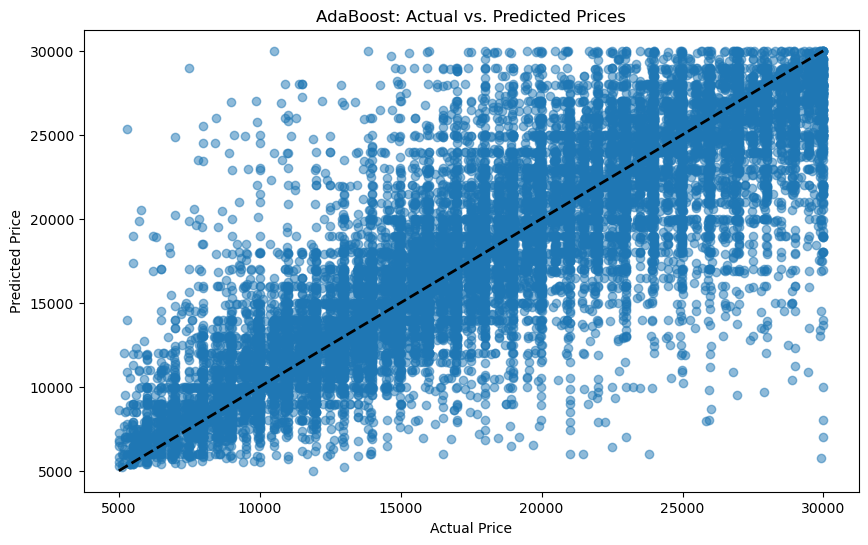

In [12]:
# Plotting y_test and y_pred to understand the spread.
%run adaboost.ipynb
out = adaboost(X_train, X_test, y_train, y_test, [20])
y_pred_test = out[0]
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('AdaBoost: Actual vs. Predicted Prices')
plt.show()

#### Conclusion. 
The errors as well as the run time is worse than bagging, though better than linear regression and decision tree models for larger n_estomators.

### 2-5-KNN w Cross Validation

In [13]:
%run KNN.ipynb

out = knn_model(X_train, X_test, y_train, y_test)

display(out[1])

,MAE CV,medAE CV,R2 CV,MAE CV (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2318.14,1734.9,0.75,2317.72,1732.46,2296.6,1704.77,0.75


<Figure size 1400x700 with 0 Axes>

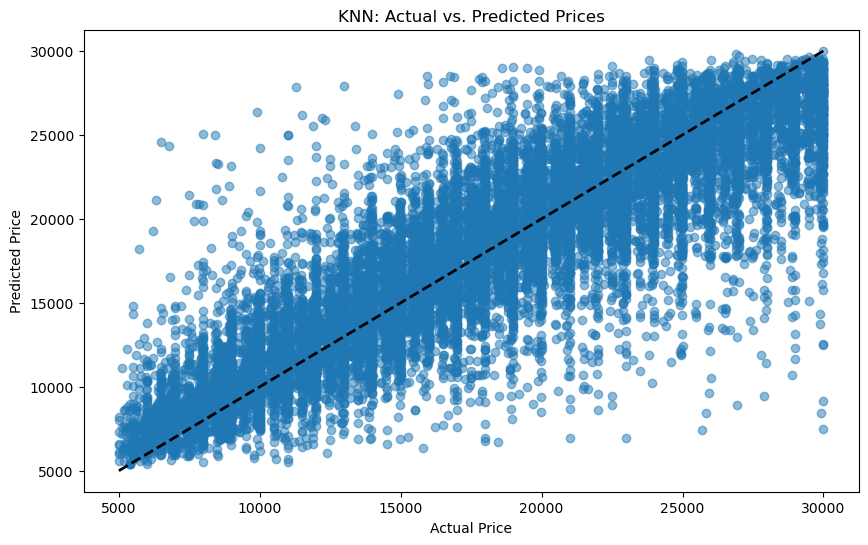

In [14]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, out[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs. Predicted Prices')
plt.show()

#### Conclusion. 
KNN results look quite satisfactory. In particular, it is much better than the previous models.

###  2-6-Random Forest w Cross Validation

In [15]:
%run Random_Forest.ipynb

start_time = time.time()

out_rand_forest = random_forest(X_train, X_test, y_train, y_test)

end_time = time.time()
execution_time = end_time - start_time

print("Execution Time: ", execution_time)
display(out_rand_forest[1])

Execution Time:  272.84773206710815


,MAE CV,medAE CV,R2 CV,MAE CV (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2329.5,1716.03,0.75,2328.99,1716.65,2312.45,1683.68,0.75


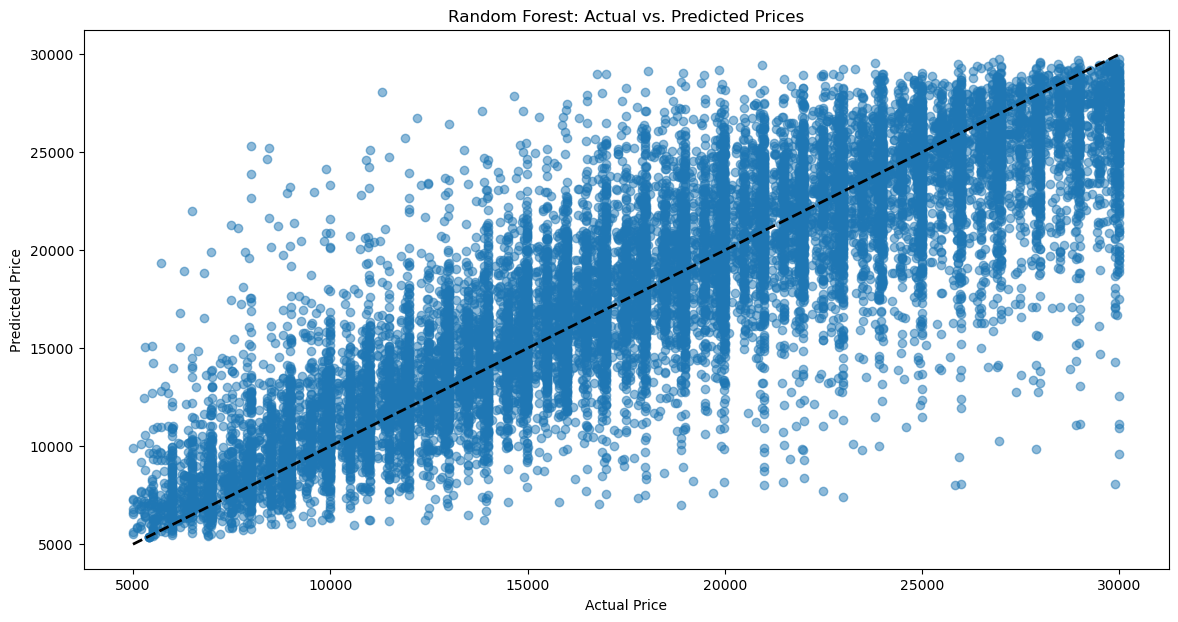

In [16]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.scatter(y_test, out_rand_forest[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.show()

####  Conclusion. 
Random Forest has similar errors to KNN which is the best among all models we have tried. 